In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

import math

In [2]:
# Defining modle metrics
from sklearn.metrics import r2_score
def R2(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [3]:
from sklearn.metrics import mean_squared_log_error
def MSLE(y_true, y_pred):
    return mean_squared_log_error(y_true, y_pred)

In [4]:
from sklearn.metrics import explained_variance_score
def EX_VAR(y_true, y_pred):
    return explained_variance_score(y_true, y_pred)

In [5]:
from sklearn.metrics import mean_absolute_error
def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

In [6]:
from sklearn.metrics import mean_squared_error
def RMSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred,squared=True)

In [7]:
def invers_result(y_pred,training_data):
    scaler_y = MinMaxScaler()
    y_for_scale=pd.DataFrame(training_data['total_grid'])
    scaler_y.fit(y_for_scale)
    y_pred=pd.DataFrame(y_pred)
    return scaler_y.inverse_transform(y_pred)/1000

In [8]:
# Reading Input data
data=pd.read_csv('final_data_2.csv')

In [9]:
print(data.index)
print(data.columns)

RangeIndex(start=0, stop=1382, step=1)
Index(['avg_outflow', 'avg_inflow', 'total_grid', 'Am', 'BOD', 'COD', 'TN',
       'T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'year',
       'month', 'day'],
      dtype='object')


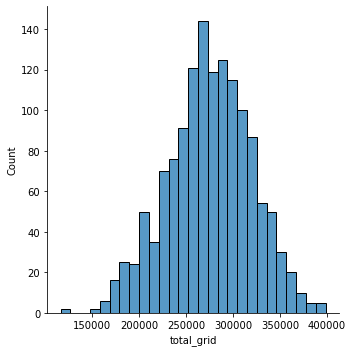

In [20]:
sns.displot(data['total_grid'])

In [24]:
data_2=data[data['total_grid']<380000]
data_3=data_2[data_2['total_grid']>170000]
len(data_3.index)

1362

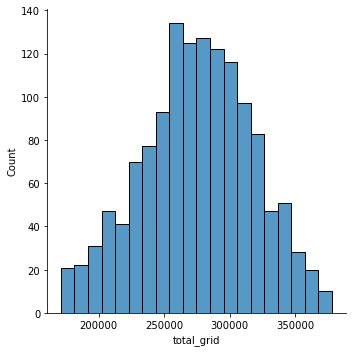

In [25]:
sns.displot(data_3['total_grid'])

In [26]:
# Selected Features= {month,TN,Am,BOD,TM,H,PP,inflow }
data_3=data_3.drop(columns=['avg_outflow', 'COD','Tm', 'SLP', 'VV', 'V', 'VM', 'VG', 'day','T','year'])
data_3.columns

Index(['avg_inflow', 'total_grid', 'Am', 'BOD', 'TN', 'TM', 'H', 'PP',
       'month'],
      dtype='object')

In [27]:
scaler = MinMaxScaler()
scaler.fit(data_3)
normdata = pd.DataFrame(scaler.transform(data_3.values), index=data_3.index, columns=data_3.columns)

In [28]:
y=normdata['total_grid']
x=normdata.drop(columns=['total_grid'])


In [100]:
print (int(len(x.index)*0.8))
print (len(y.index))

1089
1362


In [30]:
#x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=20)
#x_train,x_test,y_train,y_test=pd.concat([x[:400],x[650:]],axis=0),x[400:650],pd.concat([y[:400],y[650:]],axis=0),y[400:650]
x_train,x_test=x[:int(len(x.index)*0.8)], x[int(len(x.index)*0.8):]
y_train,y_test=y[:int(len(x.index)*0.8)],y[int(len(x.index)*0.8):]

In [31]:
x_train

,avg_inflow,Am,BOD,TN,TM,H,PP,month
0,0.000000,0.1750,0.316901,0.391885,0.577011,0.577320,0.084304,0.000000
1,0.022712,0.1500,0.323944,0.385115,0.542529,0.649485,0.000000,0.000000
2,0.038830,0.3625,0.391549,0.471577,0.625287,0.484536,0.013866,0.000000
3,0.046706,0.2875,0.408451,0.442308,0.457471,0.505155,0.000000,0.000000
4,0.073570,0.4125,0.518310,0.492115,0.439080,0.670103,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1103,0.141034,0.4625,0.295775,0.531846,0.462069,0.618557,0.000000,0.363636
1104,0.094694,0.4125,0.295775,0.460558,0.436782,0.546392,0.000000,0.363636
1105,0.083338,0.4625,0.492958,0.554231,0.344828,0.721649,0.000000,0.363636
1106,0.126015,0.3250,0.507042,0.554231,0.344828,0.618557,0.000000,0.363636


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor(n_estimators=13000,learning_rate=0.0001
                                ,min_samples_leaf=18 ,min_samples_split=30, max_depth=60)
GB.fit(x_train,y_train)
y_pred_GBM=GB.predict(x_test)
y_pred_GBM_train=GB.predict(x_train)
print ( 'R2_GBM_Test= ',R2(y_test,y_pred_GBM.flatten()) )
print ( 'R2_GBM_train= ',R2(y_train, GB.predict(x_train).flatten()) )

R2_GBM_Test=  0.18055466689871447
R2_GBM_train=  0.5313829357175628


In [56]:
inv_real=invers_result(y_test,data_3)
inv_GBM=invers_result(y_pred_GBM.flatten(),data_3)
print ( 'R2_GBM_Test= ',R2(inv_real,inv_GBM) )
print ( 'Explained variance P_GBM_Test= ',explained_variance_score(inv_real,inv_GBM) )
print('MAE = ',MAE(inv_real,inv_GBM))

R2_GBM_Test=  0.18055466689871447
Explained variance P_GBM_Test=  0.18410544943867146
MAE =  26.877105348778564


In [57]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
reg_pred=reg.predict(x_test)
print ( 'R2_reg_Test= ',R2(y_test,reg_pred.flatten()) )

R2_reg_Test=  0.011750514685781033


In [58]:
from sklearn import metrics
print('MSE = ',metrics.mean_squared_error(y_test,y_pred_GBM))
print('MAE = ', metrics.mean_absolute_error(y_test,y_pred_GBM))

MSE =  0.02690756036177936
MAE =  0.1297295337766489


In [59]:
from sklearn.ensemble import RandomForestRegressor
regressior= RandomForestRegressor(bootstrap=True,max_depth= 12, max_features='auto'
                                  ,min_samples_leaf= 5,min_samples_split= 5,n_estimators= 2000)
regressior.fit(x_train,y_train)
y_pred_RF=regressior.predict(x_test)
y_pred_RF2=regressior.predict(x)
y_pred_RF_train=regressior.predict(x_train)
print ( 'R2_RF_Test= ',R2(y_test,y_pred_RF.flatten()) )
print ( 'R2_RF_ALL= ',R2(y, y_pred_RF2.flatten()) )

R2_RF_Test=  0.1401228888002608
R2_RF_ALL=  0.6049067013925522


In [60]:
from sklearn import metrics
print('MSE_test = ',metrics.mean_squared_error(y_test,y_pred_RF))
print('MAE_test = ', metrics.mean_absolute_error(y_test,y_pred_RF))

MSE_test =  0.028235190730483577
MAE_test =  0.13369148588355806


In [61]:
x_train.shape

(1089, 8)

In [62]:
from keras.models import Sequential
from keras.layers import Dense , LSTM
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(20, input_dim = 8, activation='relu'))

# Adding the second hidden layer
model.add(Dense(units = 100, activation = 'relu'))
# Adding the second hidden layer
model.add(Dense(units = 120, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [63]:

model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.fit(x_train, y_train , epochs=80, verbose=2)

Epoch 1/80
35/35 - 1s - loss: 0.2253 - mae: 0.2253
Epoch 2/80
35/35 - 0s - loss: 0.1657 - mae: 0.1657
Epoch 3/80
35/35 - 0s - loss: 0.1601 - mae: 0.1601
Epoch 4/80
35/35 - 0s - loss: 0.1583 - mae: 0.1583
Epoch 5/80
35/35 - 0s - loss: 0.1540 - mae: 0.1540
Epoch 6/80
35/35 - 0s - loss: 0.1551 - mae: 0.1551
Epoch 7/80
35/35 - 0s - loss: 0.1568 - mae: 0.1568
Epoch 8/80
35/35 - 0s - loss: 0.1514 - mae: 0.1514
Epoch 9/80
35/35 - 0s - loss: 0.1544 - mae: 0.1544
Epoch 10/80
35/35 - 0s - loss: 0.1523 - mae: 0.1523
Epoch 11/80
35/35 - 0s - loss: 0.1505 - mae: 0.1505
Epoch 12/80
35/35 - 0s - loss: 0.1492 - mae: 0.1492
Epoch 13/80
35/35 - 0s - loss: 0.1557 - mae: 0.1557
Epoch 14/80
35/35 - 0s - loss: 0.1555 - mae: 0.1555
Epoch 15/80
35/35 - 0s - loss: 0.1527 - mae: 0.1527
Epoch 16/80
35/35 - 0s - loss: 0.1520 - mae: 0.1520
Epoch 17/80
35/35 - 0s - loss: 0.1494 - mae: 0.1494
Epoch 18/80
35/35 - 0s - loss: 0.1496 - mae: 0.1496
Epoch 19/80
35/35 - 0s - loss: 0.1497 - mae: 0.1497
Epoch 20/80
35/35 - 0

In [64]:
y_pred_ANN=model.predict(x_test)
y_pred_ANN_train=model.predict(x_train)
y_pred_ANN2=model.predict(x)
print ( 'R2_ANN_Test= ',R2(y_test,y_pred_ANN.flatten()) )
print ( 'R2_ANN_ALL= ',R2(y, y_pred_ANN2.flatten()) )

R2_ANN_Test=  -0.02436923412472658
R2_ANN_ALL=  0.25792661626180535


In [65]:
xx=x_train.to_numpy()
x_train2=np.reshape(xx,(xx.shape[0],xx.shape[1],1))

In [66]:
x_train2.shape

(1089, 8, 1)

In [67]:
from keras.layers import Dropout

# Initialising the RNN
model = Sequential()

model.add(LSTM(units = 60, return_sequences =True, batch_input_shape=(None, 8,1)))
#model.add(Dropout(0.2))

# Adding a second LSTM layer and Dropout layer
#model.add(LSTM(units = 10, return_sequences = True))
#model.add(Dropout(0.2))

# Adding a third LSTM layer and Dropout layer
#model.add(LSTM(units = 50, return_sequences =True))
#model.add(Dropout(0.2))

# Adding a fourth LSTM layer and and Dropout layer
model.add(LSTM(units = 60, return_sequences =False))
#model.add(Dropout(0.2))

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 1))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [68]:
xxt=x_test.to_numpy()
x_test2=np.reshape(xxt,(xxt.shape[0],xxt.shape[1],1))
model.fit(x_train2,y_train, validation_data=(x_test2,y_test), epochs=60)

Epoch 1/60
35/35 [==============================] - 6s 63ms/step - loss: 0.1467 - mse: 0.1467 - mae: 0.3216 - val_loss: 0.0398 - val_mse: 0.0398 - val_mae: 0.1608
Epoch 2/60
35/35 [==============================] - 1s 15ms/step - loss: 0.0471 - mse: 0.0471 - mae: 0.1755 - val_loss: 0.0360 - val_mse: 0.0360 - val_mae: 0.1517
Epoch 3/60
35/35 [==============================] - 1s 19ms/step - loss: 0.0480 - mse: 0.0480 - mae: 0.1791 - val_loss: 0.0355 - val_mse: 0.0355 - val_mae: 0.1507
Epoch 4/60
35/35 [==============================] - 1s 21ms/step - loss: 0.0460 - mse: 0.0460 - mae: 0.1747 - val_loss: 0.0334 - val_mse: 0.0334 - val_mae: 0.1455
Epoch 5/60
35/35 [==============================] - 1s 15ms/step - loss: 0.0462 - mse: 0.0462 - mae: 0.1759 - val_loss: 0.0331 - val_mse: 0.0331 - val_mae: 0.1446
Epoch 6/60
35/35 [==============================] - 1s 15ms/step - loss: 0.0461 - mse: 0.0461 - mae: 0.1770 - val_loss: 0.0442 - val_mse: 0.0442 - val_mae: 0.1722
Epoch 7/60
35/35 [====

35/35 [==============================] - 1s 15ms/step - loss: 0.0354 - mse: 0.0354 - mae: 0.1484 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1443
Epoch 52/60
35/35 [==============================] - 0s 14ms/step - loss: 0.0404 - mse: 0.0404 - mae: 0.1596 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1430
Epoch 53/60
35/35 [==============================] - 1s 17ms/step - loss: 0.0356 - mse: 0.0356 - mae: 0.1478 - val_loss: 0.0322 - val_mse: 0.0322 - val_mae: 0.1408
Epoch 54/60
35/35 [==============================] - 0s 14ms/step - loss: 0.0389 - mse: 0.0389 - mae: 0.1588 - val_loss: 0.0339 - val_mse: 0.0339 - val_mae: 0.1440
Epoch 55/60
35/35 [==============================] - 1s 14ms/step - loss: 0.0384 - mse: 0.0384 - mae: 0.1575 - val_loss: 0.0319 - val_mse: 0.0319 - val_mae: 0.1411
Epoch 56/60
35/35 [==============================] - 0s 14ms/step - loss: 0.0364 - mse: 0.0364 - mae: 0.1516 - val_loss: 0.0325 - val_mse: 0.0325 - val_mae: 0.1414
Epoch 57/60
35/35 [=========

In [69]:
y_pred_RNN_train=model.predict(x_train2)
y_pred_RNN=model.predict(x_test2)
#y_pred_RNN2=model.predict(x)
print ( 'R2_RNN_Test= ',R2(y_test,y_pred_RNN.flatten()) )
print ( 'R2_RNN_Train= ',R2(y_train,y_pred_RNN_train.flatten()) )
#print ( 'R2_RNN_ALL= ',R2(y, y_pred_RNN2) )
#y_pred_RNN[:,0].shape

R2_RNN_Test=  0.013775602111289031
R2_RNN_Train=  0.1595691068917232


In [70]:
y_pred_RNN.flatten().shape

(273,)

In [71]:
x.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381],
           dtype='int64', length=1362)

plt.rcParams.update({'font.size': 14})
plt.scatter(y_pred_RNN.flatten(),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("RNN Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for RNN ')
plt.plot((0,1),(0,1), color='red')

plt.rcParams.update({'font.size': 14})
plt.scatter(y_pred_ANN.flatten(),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("ANN Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for ANN ')
plt.plot((0,1),(0,1), color='red')

plt.rcParams.update({'font.size': 14})
plt.scatter(GB.predict(x_test),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("GBM Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for GBM ')
plt.plot((0,1),(0,1), color='red')

plt.rcParams.update({'font.size': 14})
plt.scatter(y_pred_RF.flatten(),y_test)
plt.ylim((0,1))
plt.xlim((0,1))
plt.xlabel("RF Prediction")
plt.ylabel("Real values")
plt.title('Prediction Vs. Real for RF ')
plt.plot((0,1),(0,1), color='red')

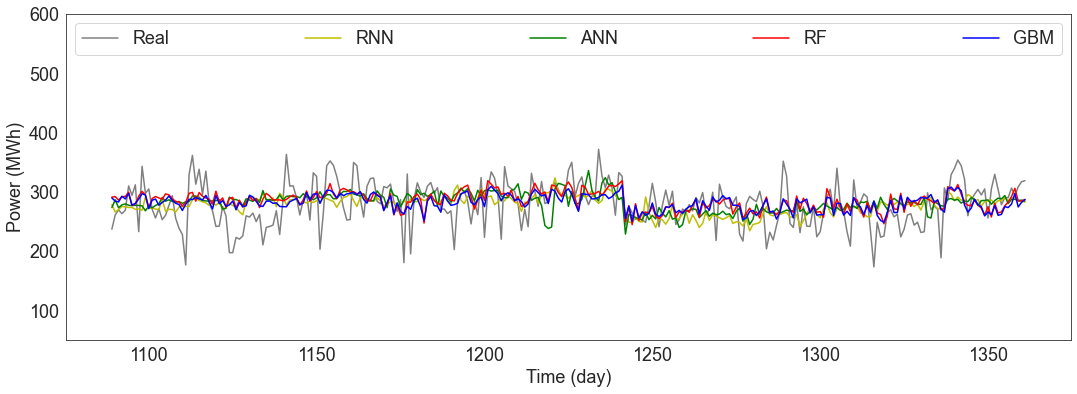

In [104]:
time=list(range(int(len(x.index)*0.8),len(y_test)+int(len(x.index)*0.8)))
plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(18,6), )


#plt.xlim(700,832), plt.ylim(40, 160)
#plt.plot([800,800],[0,500],  linestyle=':',color = 'k')
plt.plot(time,invers_result(y_test,data_3), color = 'gray', label = 'Real')
plt.plot(time,invers_result(y_pred_RNN.flatten(),data_3), color = 'y', label = 'RNN')
plt.plot(time,invers_result(y_pred_ANN.flatten(),data_3), color = 'green', label = 'ANN')
plt.plot(time,invers_result(y_pred_RF.flatten(),data_3), color = 'red', label = 'RF')
plt.plot(time,invers_result(GB.predict(x_test),data_3), color = 'blue', label = 'GBM')


plt.xlabel("Time (day)")
plt.ylabel("Power (MWh)")
#plt.title('Daily Prediction ')
plt.ylim((50,600))
plt.legend(loc='upper center', mode='expand',ncol=5)
plt.savefig('zoom-Scenario I.png')
plt.show()

In [76]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a =  data+500
    n = len(a)
    m=np.mean(a)
    se =math.sqrt(((a-m)**2).sum()/n-1)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-500, m-h-500, m+h-500

In [79]:
a = real_error
n = len(a)
m=np.mean(a)
se =math.sqrt(((a-m)**2).sum()/n-1)
se*1.9/math.sqrt(n)
print()

In [78]:
real_error=invers_result(y_test,data_3)-invers_result(GB.predict(x_test),data_3)
print(mean_confidence_interval(real_error))


(-2.2370868379973103, -68.96902020806635, 64.49484653207173)


In [80]:
data_error=pd.DataFrame(invers_result(y_test,data_3), columns=['real_data'])
data_error['GBM_pred']=invers_result(GB.predict(x_test),data_3)
data_error['real_error']=invers_result(y_test,data_3)-invers_result(GB.predict(x_test),data_3)

In [81]:
data_error

,real_data,GBM_pred,real_error
0,236.521,289.395348,-52.874348
1,260.440,283.764677,-23.324677
2,269.052,282.390412,-13.338412
3,262.713,292.053836,-29.340836
4,268.245,287.524724,-19.279724
...,...,...,...
268,305.938,278.903242,27.034758
269,293.446,296.394452,-2.948452
270,307.968,273.995997,33.972003
271,316.675,281.913895,34.761105


In [82]:
good_data=data_error[data_error['real_error']>-65]
good_data2=good_data[good_data['real_error']<50]

In [83]:
len(good_data2.index)/254

0.9881889763779528

(-120.0, 120.0)

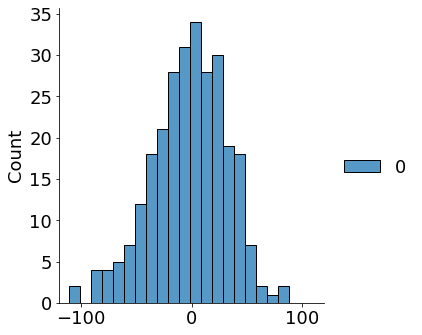

In [93]:
sns.displot(real_error, bins=20)
plt.xlim(-120,120)

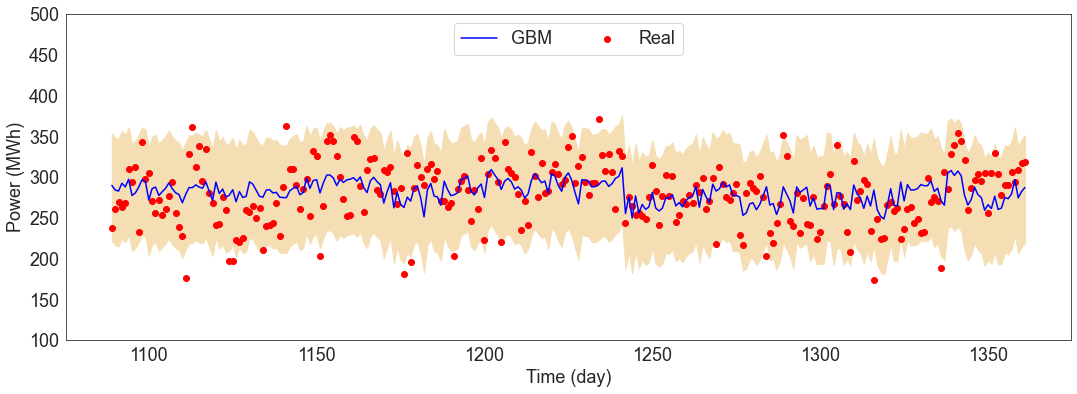

In [134]:
time=list(range(int(len(x.index)*0.8),len(y_test)+int(len(x.index)*0.8)))[:]
plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(18,6), )

plt.plot(time,invers_result(GB.predict(x_test),data_3)[:], color = 'blue', label = 'GBM')
plt.xlabel("Time (day)")
plt.ylabel("Power (MWh)")
#plt.title('Daily Prediction ')
plt.ylim((100,500))

plt.savefig('zoom-Scenario I.png')
plt.fill_between(time,(invers_result(GB.predict(x_test),data_3)[:]-68)[:,0]
                 ,(invers_result(GB.predict(x_test),data_3)[:]+64)[:,0], color='wheat')
plt.scatter(time,invers_result(y_test,data_3)[:], color = 'red', label = 'Real')
plt.legend(loc='upper center',ncol=2)
plt.show()

#plt.fill_between()

In [120]:
(invers_result(GB.predict(x_test),data_3)[:50]-68)[:,0]

array([221.39534809, 215.76467741, 214.39041188, 224.05383648,
       219.52472366, 228.92485079, 208.99276035, 212.06208823,
       219.29612403, 228.41079028, 226.10413788, 203.35858472,
       217.42952977, 219.32264261, 208.97070601, 213.58632571,
       217.82477337, 224.38062665, 217.38800302, 212.24629883,
       210.16295169, 200.08770044, 210.50100299, 218.70203441,
       218.58692254, 221.97551758, 219.40383204, 217.84784733,
       225.53066001, 214.38107512, 202.76703618, 225.41203269,
       211.39043831, 216.87142133, 207.08530617, 209.42664196,
       216.10510118, 201.30666095, 213.71679505, 206.58270098,
       207.84918896, 225.74341849, 222.83704861, 215.49162716,
       207.92036115, 206.87966383, 215.6931163 , 216.05132197,
       212.07829519, 212.88014154])

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RNN Error Distribution')

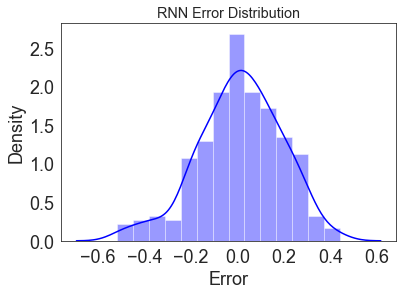

In [94]:
sns.set_style("white")
ax = sns.distplot(y_test-y_pred_RNN.flatten(), color='blue')
plt.rcParams.update({'font.size': 12})
plt.xlabel('Error')
plt.title('RNN Error Distribution')

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'ANN Error Distribution')

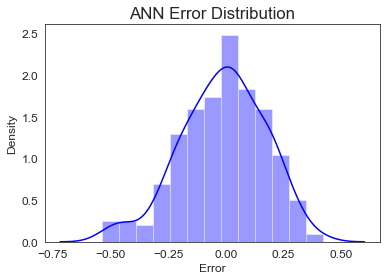

In [95]:

sns.set_style("white")
ax = sns.distplot(y_test-y_pred_ANN.flatten(), color='blue')
plt.rcParams.update({'font.size': 14})
plt.xlabel('Error')
plt.title('ANN Error Distribution')

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RF Error Distribution')

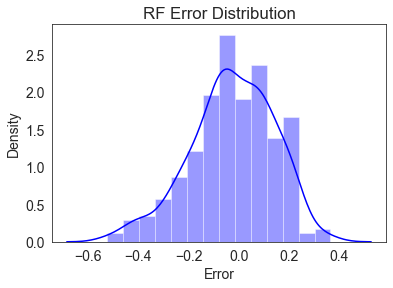

In [96]:
plt.rcParams.update({'font.size': 14})

sns.set_style("white")
ax = sns.distplot(y_test-y_pred_RF.flatten(), color='blue')
plt.xlabel('Error')
plt.title('RF Error Distribution')

F:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'GBM Error Distribution')

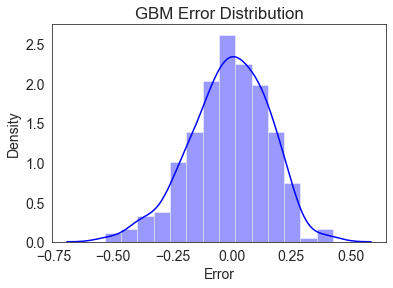

In [97]:
plt.rcParams.update({'font.size': 14})

sns.set_style("white")
ax = sns.distplot(y_test-GB.predict(x_test), color='blue')
plt.xlabel('Error')
plt.title('GBM Error Distribution')

In [98]:
result=pd.DataFrame()
result['ML_Type']=['GBM','RF','ANN','RNN']

result['RMSE_Test']=[RMSE(y_test,GB.predict(x_test)),RMSE(y_test,y_pred_RF.flatten())
                    ,RMSE(y_test,y_pred_ANN.flatten()),RMSE(y_test,y_pred_RNN.flatten())]
result['RMSE_Train']=[RMSE(y_train,GB.predict(x_train)),RMSE(y_train,y_pred_RF_train.flatten())
                     ,RMSE(y_train,y_pred_ANN_train.flatten()),RMSE(y_train,y_pred_RNN_train.flatten())]
j2=[]
for i in range(len(result["RMSE_Test"])):
    j2.append(result["RMSE_Test"][i]**2/result["RMSE_Train"][i]**2)
    
result['J_2']=j2

result['MAE_Test']=[MAE(y_test,GB.predict(x_test)),MAE(y_test,y_pred_RF.flatten())
                    ,MAE(y_test,y_pred_ANN.flatten()),MAE(y_test,y_pred_RNN.flatten())]
result['MAE_Train']=[MAE(y_train,GB.predict(x_train)),MAE(y_train,y_pred_RF_train.flatten())
                     ,MAE(y_train,y_pred_ANN_train.flatten()),MAE(y_train,y_pred_RNN_train.flatten())]

result['MSLE_Test']=[MSLE(y_test,GB.predict(x_test)),MSLE(y_test,y_pred_RF.flatten())
                     ,MSLE(y_test,y_pred_ANN.flatten()),MSLE(y_test,y_pred_RNN.flatten())]
result['MSLE_Train']=[MSLE(y_train,GB.predict(x_train)),MSLE(y_train,y_pred_RF_train.flatten())
                      ,MSLE(y_train,y_pred_ANN_train.flatten()),MSLE(y_train,y_pred_RNN_train.flatten())]

result['Ex_Var_Test']=[EX_VAR(y_test,GB.predict(x_test)),EX_VAR(y_test,y_pred_RF.flatten())
                       ,EX_VAR(y_test,y_pred_ANN.flatten()),EX_VAR(y_test,y_pred_RNN.flatten())]
result['Ex_Var_Train']=[EX_VAR(y_train,GB.predict(x_train)),EX_VAR(y_train,y_pred_RF_train.flatten())
                        ,EX_VAR(y_train,y_pred_ANN_train.flatten()),EX_VAR(y_train,y_pred_RNN_train.flatten())]

In [99]:
result

,ML_Type,RMSE_Test,RMSE_Train,J_2,MAE_Test,MAE_Train,MSLE_Test,MSLE_Train,Ex_Var_Test,Ex_Var_Train
0,GBM,0.026908,0.020872,1.662005,0.129730,0.114159,0.012699,0.010043,0.184105,0.531383
1,RF,0.028235,0.013809,4.181004,0.133691,0.089825,0.013438,0.006716,0.160167,0.689968
2,ANN,0.033637,0.030798,1.192832,0.145674,0.135965,0.015695,0.014422,-0.019051,0.309186
3,RNN,0.032384,0.037432,0.748473,0.142021,0.153701,0.014999,0.017505,0.016645,0.165830


In [71]:
result.to_csv('metric_results.csv')